

VERSIÓN 1.0 CÓDIGO TESIS DE PREGRADO

RECONSTRUCCIÓN DE OBJETOS 3D UTILIZANDO HOLOGRAMAS FRACCIONARES Y REDES NEURONALES PARA EL RECONOCIMIENTO DE PATRONES DE DIFRACCIÓN

ROBERTO ANTONIO CUELLAR LOZANO UNIVERSIDAD DE PAMPLONA PAMPLONA- NORTE DE SANTANDER


In [31]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as pl
from matplotlib.patches import Polygon # importante para geometrias 
from pylab import *

Para guardar una imagen con tamaño de 768x 768 pixeles, se usa la siguiente linea definiendo la figura
Son 100 pixeles por pulgada y 7.68 pulgadas, por lo tanto  768 pixeles, exactamente el tamaño del modulador

In [36]:

def aju_guar_fig(Z):
    pl.figure(num = 1, figsize= (7.68,7.68), dpi =100) #
    ax = Axes(pl.gcf(),[0,0,1,1],yticks=[],xticks=[],frame_on=False)
    pl.gcf().delaxes(plt.gca())
    pl.gcf().add_axes(ax)
    pl.imshow(Z, cmap="gray")
    pl.savefig("IMAGEN.png", dpi = 100)

PARÁMETROS DE SIMULACIÓN AJUSTADOS AL MODULADOR ESPACIAL DE LUZ LCR2500

In [10]:
# Parámetros del modulador y el tamaño del pixel de modulador

M = 768 # numero de pixeles del modulador
N = 768
pi = np.pi
dx = 19e-6 # tamano del modulador
LX = M*dx
LY = M*dx
x = np.linspace(-LX/2,(LX/2)-dx, M) # dominio espacial modulador
y = x
l_onda = 514e-9 # longitud de onda
k = 2*pi/l_onda # numero de onda

La función proptf realiza la transformada de fourier utilizando la función de transferencia : \
$u_{f}= F^{-1}[U_{entrada}H] $ \
Donde $U_{entrada}$ es la transformada de fourier de la imagen objeto y $H$ la función de transferencia


In [22]:
# funcion calculo de la difraccion en propagacion libre

def proptf(entrada, l_onda, z):
    M = 768
    N = 768
    dx = 19e-6
    LX = M*dx
    LY = N*dx
    pi = np.pi
    fx = np.linspace(-1/(2*dx),1/(2*dx)-1/LX, M)
    fy = fx
    FX, FY = np.meshgrid(fx, fy)
    H = np.exp(-1j*pi*l_onda*z*((FX**2)+(FY**2)))
    H = np.fft.fftshift(H)
    U1 = np.fft.fft2(np.fft.fftshift(entrada))
    U2 = H*U1
    salida =np.fft.fftshift(np.fft.ifft2(U2))
    #pl.imshow(abs(np.fft.fftshift(salida))**2)
    #pl.show()
    return (salida)

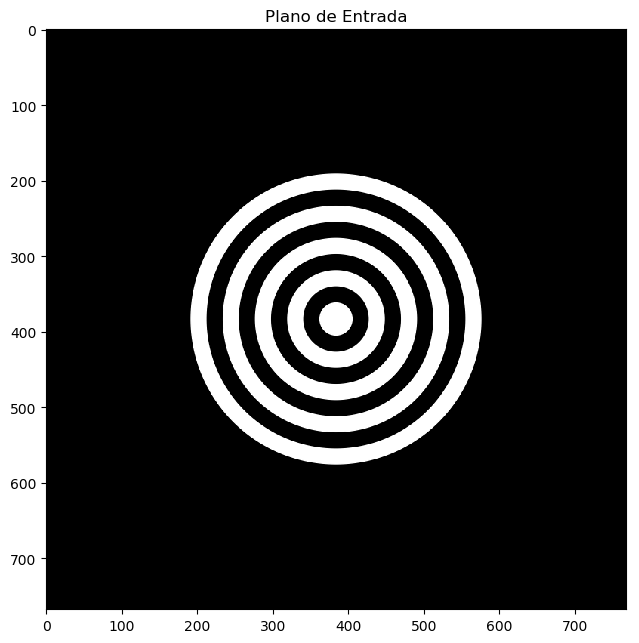

In [239]:
# Parámetros de la ventana de senal de entrada
w = 100*dx
z = 0.8

a = plt.imread("TESTEo.png") # se lee la imagen deseada con tamano 768x768
entrada = a[:,:,1]

# signal de prueba
#xx = np.where(abs(x)<= w , 1, 0) # funcion rectangulo de ancho 2w
#X , Y = np.meshgrid(xx ,xx) # arreglo bidimensional 
#entrada = X*Y #funcion rectangulo 

pl.figure(num = 1, figsize= (7.68,7.68), dpi =100)
pl.imshow(entrada, cmap ='gray')
pl.title('Plano de Entrada')
pl.show()

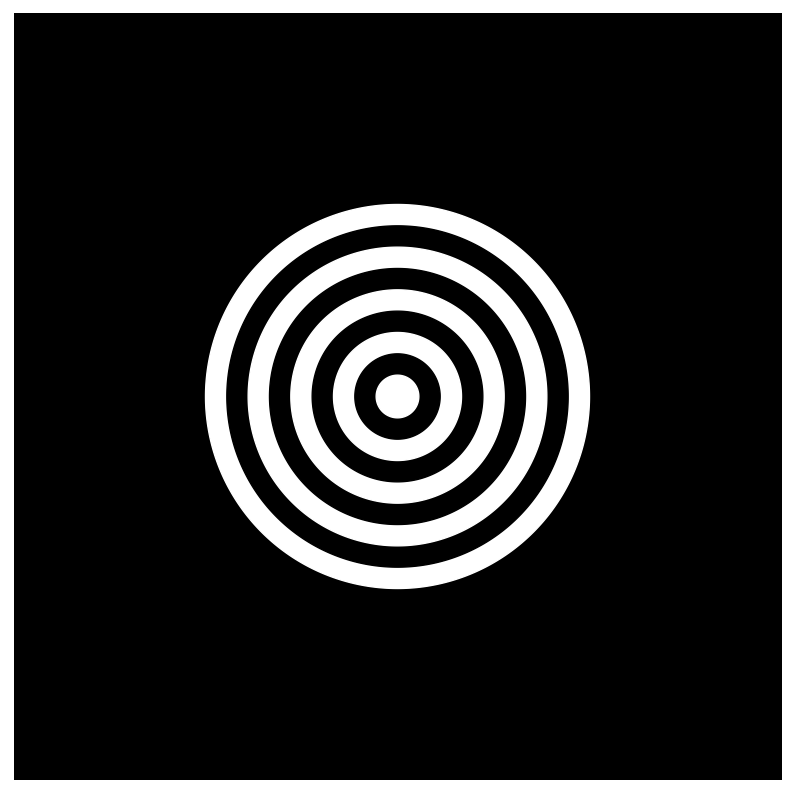

In [238]:
#####  generando geometrías variadas

n_anillos = 10
rmaxx = 4.
rmax = (rmaxx/2)-1
rmin = 0.0
centrox = 2 # centro en la coordenada en x de los anillos
centroy = 2 # centro en la coordenada en y de los anillos
ratio = (rmax-rmin)/n_anillos
vec_rad = np.linspace(rmin,rmax,n_anillos)

theta2 = np.linspace(0, 2*np.pi, 768)
col = "black"
fig = pl.figure(num = 1, figsize= (7.68,7.68), dpi =100) ## son 100 pixe
ax = pl.axes([0,0,1,1],yticks=[],xticks=[],frame_on=False) # instruccion crucial para llenar completamente la figura
for i in reversed(vec_rad): #reversed toma el vector comenzando por atras
    xa = (i * np.cos(theta2))+ centrox
    ya = (i * np.sin(theta2))+ centroy
    if col == "white":
        col = "black"
    elif col == "black":
        col = "white"
    poly = Polygon(np.column_stack([xa, ya]), color= col) # crea el circulo  
    ax.add_patch(poly)
    #ax.set_xlim((0, rmax))
    #ax.set_ylim((0, rmax))
plano = np.zeros([768, 768], dtype = int)    
pl.imshow(plano, cmap = "gray")
ax.set_xlim((0, rmaxx))
ax.set_ylim((0, rmaxx))

#pl.axis('off')
pl.savefig("TESTEo.png")
#pl.show()
    

#### generando geometrías variadas

In [170]:
print (vec_rad)

[0.2        0.32857143 0.45714286 0.58571429 0.71428571 0.84285714
 0.97142857 1.1        1.22857143 1.35714286 1.48571429 1.61428571
 1.74285714 1.87142857 2.        ]


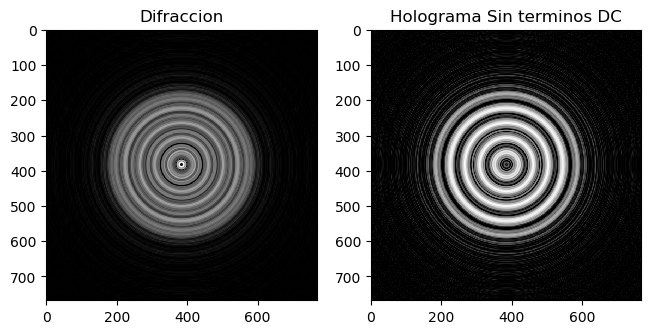

In [240]:
# visualizacion de la difraccion de fresnel del objeto de entrada y el respectivo holograma

difraccion = proptf(entrada, l_onda, z)
dif = np.amax(difraccion)
difraccion = difraccion/dif
ref = np.exp(1j*k*z)*np.ones([M, M], dtype = int) # onda de referencia

e1 = ref*ref.conjugate()
e2 = difraccion*difraccion.conjugate()
e3 = ref*difraccion.conjugate()
e4 = difraccion*ref.conjugate()
et=e1+e2+e3+e4;
I5=abs(et);
I5=I5-abs(e1)-abs(e2)
I6=np.amax(I5)
I5=(I5/I6);

#holograma = (ref+difraccion)**2 # holograma con terminos de DC
pl.figure(num = 1, figsize= (7.68,7.68), dpi =100)
pl.subplot(1,2,1)
pl.imshow(np.log(abs((difraccion)**2)+0.01), cmap = 'gray')
pl.title('Difraccion')
pl.subplot(1,2,2)
pl.imshow(np.log(abs(I5)**2+0.01), cmap = 'gray')
pl.title('Holograma Sin terminos DC')
pl.show()

Text(0.5, 1.0, 'Reconstruccion')

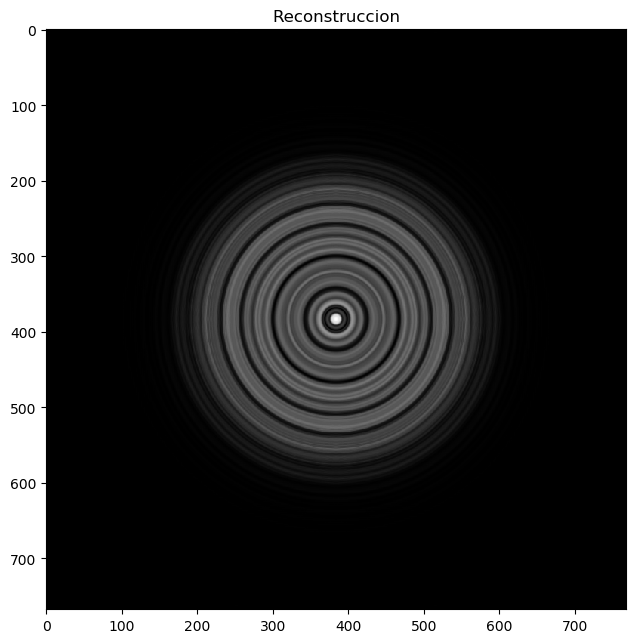

In [241]:
### visualizacion de la reconstruccion 
holoint = abs(I5**2)
holoint = holoint/np.max(holoint)# se normaliza el hologama
holorecons = proptf(ref*holoint, l_onda, z)

pl.figure(num = 1, figsize= (7.68,7.68), dpi =100)

pl.imshow(np.log(abs(holorecons)**2+0.1), cmap = 'gray')
pl.title('Reconstruccion')


#pl.show()